<center><h1>Assignmnet 4</h1>
<br/>

<b>Name:  Maulik Rajpara <br/>
SID:200401712 &nbsp;
Email:mbr786@uregina.ca</center>

##Part A: Determine Model 
<p align="justify">
 For building any predictive model using machine learning, we apply some algorithm to create it. However, there are many algorithms available which can be applied to the same kind of dataset like random forest classification, linear regression, and k-means, etc. Among this, selecting a proper algorithm for a given dataset is an important job. For choosing the right algorithm many factors participate like the relation between parameters. Any mistake in choosing a proper algorithm can reduce the accuracy of the prediction model. Considering the loan status prediction model, we can narrow down two main classification algorithm i.e. linear regression and random forest classification. But, Observing current dataset choosing linear regression won't be a wise choice. Reason for not choosing it is that linear regression algorithm is more suitable for dataset which has a few thousands of data items. Compared to our dataset which has nearly 600 data items. Moreover, Linear regression model takes to much time process the data and currently, our problem is of the financial sector which demands faster operation.
  
On the other hand, the random forest classification algorithm works on a smaller size of the dataset. Working of random forest classification involves creating the small size of a decision tree which can lead to the desired output. This algorithm only focuses on the data which can be predicated in the form of tree structures. Other data is ignored. So using a variety of decision tree, it creates a robust model. In other words, it uses multiple outputs from smaller decision trees and combining their output model achieves a better prediction decision.

In [0]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
new_upload=files.upload()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving train.csv to train (1).csv


<p align="justify">Here one copy of the original dataset is created so the original dataset will remain intact from any manipulation operation performed on data-set.



In [0]:
import pandas as pd
import io
input_File = pd.read_csv(io.BytesIO(new_upload['train.csv']))
print("The total No of Cloumns and rows:  {}".format(input_File.shape))
#duplicate
data_set=input_File.copy()

The total No of Cloumns and rows:  (614, 13)


In [0]:
data_set.columns.to_series().groupby(data_set.dtypes).groups

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

##Part B: Model Algorithm

<p align="justify">For using random forest classification algorithm on the selected dataset(Kaggle.com, 2019). The first thing to take into consideration is whether the dataset's information is compatible with the algorithm's requirement. In selected dataset, there are two major task which should be done for training the model. 

1.   Handling Missing Values
2.   Converting Text into Numeric values



> <h3> Handling Missing Value</h3>


> As shown below the current dataset have some missing values in many columns. Missing values can make prediction model less accurate.







In [0]:
#report number of missing values for each feature
for title in data_set.columns:
    missing_values = data_set[title][data_set[title].isna() == True]
    print(title, missing_values.size)
    

Loan_ID 0
Gender 13
Married 3
Dependents 15
Education 0
Self_Employed 32
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
Property_Area 0
Loan_Status 0


<p align="justify">To handle missing value some mathematical operation will be used. In both, the case on numerical and non-numerical data missing values will be filled in a different manner. For the non-numerical data, missing values will be filled with the mode value of that column. And in case of the numerical data missing values will be replaced by the median of the column. After replacing all the values dataset will again check for any null values.

In [0]:

data_set["Gender"].fillna(data_set["Gender"]\
                          .mode()[0],inplace=True)
data_set["Married"].fillna(data_set["Married"]\
                           .mode()[0],inplace=True)
data_set["Dependents"].fillna(data_set["Dependents"]\
                              .mode()[0],inplace=True)
data_set["Self_Employed"].fillna(data_set["Self_Employed"]\
                                 .mode()[0],inplace=True)
data_set["Credit_History"].fillna(data_set["Credit_History"]\
                                  .mode()[0],inplace=True)

data_set["LoanAmount"].fillna(data_set["LoanAmount"]\
                              .median(),inplace=True)
data_set["Loan_Amount_Term"].fillna(data_set["Loan_Amount_Term"]\
                                    .median(),inplace=True)


<p align="justify">After performing the operation it is observed that there are no more null values found in data-set.

In [0]:
data_set.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<p align="justify">
<h3>Converitng Text Into Numeric Values</h3>
 Second Major task for creating a suitable dataset for the algorithm is to convert Non-numerical data into meaning full numeric data. For this conversation pandas,  library will be used. With the help of the dummy function, all the text information will be converted to numeric data.

<p align="justify">Now the dataset will be ready to train with help algorithm. And the value of loan status can be compared with values properly for creating the predictive calculations.

In [0]:

temp_data_set=data_set
temp_data_set=temp_data_set\
    .drop('Loan_ID',axis=1)
temp_data_set2=temp_data_set\
    .drop('Loan_Status',axis=1)
t=temp_data_set.Loan_Status

temp_data_set2=pd.get_dummies(temp_data_set2)

temp_data_set2.head(5)



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [0]:
classification_Val = {'Y':1, 'N':0}
t = t.apply(lambda x: classification_Val[x])

final_dataset= pd.concat([t, temp_data_set2], axis=1)
final_dataset.head()

,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,1,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,1,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,1,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


##Part C: Model Building & Visualisations
<p align="justify">Scikit learn library is used to develop a model using a random forest algorithm. This library has many predefined model, metrics, preprocessing function and clustering methods(T. Mahboob, 2016). With the use of this library, one can create a model without dealing with any complex code structure.
The model building requires two major parts which train dataset and test dataset. test dataset will not have loan status column in it. it is dropped so a model can be compared with the actual value.

<p align="justify">Here we will be using the RandomForest Classifier algorithm which is a predefined method in the scikit library. After the model training gets finished, the accuracy of the model will be calculated based on its best ability to predict the loan status.

In [0]:
from sklearn.model_selection import train_test_split



main_Val = final_dataset['Loan_Status']
main_Val_loc = final_dataset.drop('Loan_Status', axis = 1)

X_train, X_test, y_train, y_test = \
train_test_split(main_Val_loc, main_Val, test_size=0.4, random_state=10)

In [0]:
from sklearn.ensemble import RandomForestClassifier

learning_model = RandomForestClassifier()
learning_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
predict_results = learning_model.predict(X_test)
print("The accuracy of  model is: ")
accuracy_score(y_test, predict_results)*100

The accuracy of  model is: 


75.20325203252033

#Part D: Discussion
<p align="justify">Model created with random forest classifier has given the accuracy of 75% which means the model predicts almost all the value correctly. To show the model's result validity, confusion matrix and chart of important features affecting the result is plotted. As shown in figure 1 the most aspect affecting the loan status are credit history and applicant's income. which supports the charts plotted with the value of the dataset. Now talking about the confusion matrix, it shows the analysis between the loan status outcome of actual dataset value against the outcome predicted the model. As seen in confusion matrix the model has given the accurate result of the situation in which loan was rejected. Using this analysis, the prediction model can be revised to make it more accurate.

fig 1: Top Features affecting Loan Status


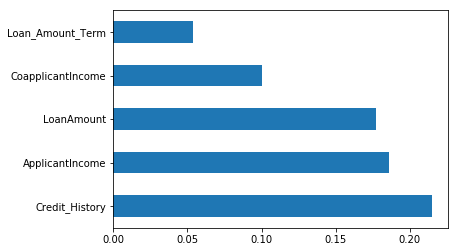

In [0]:
top_features = pd.Series(learning_model.feature_importances_, temp_data_set2.columns)
top_features = top_features.nlargest(5)
top_features.plot(kind='barh')

print('fig 1: Top Features affecting Loan Status')

Text(0.5, 257.44, 'Predicted label')

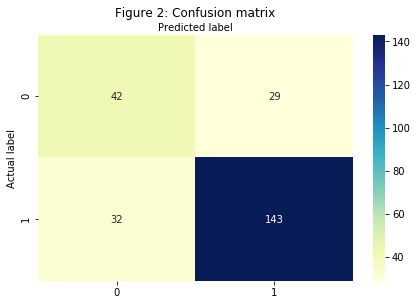

In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, learning_model.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Figure 2: Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Part E: Summary
<p align="justify">On creating a predictive model regarding applied loan status, it is clear that for building any such model requires a crucial task of data management and also finding the flaws in such data. The dataset that is used continued valuable information up front. So, the created model for this data frames was a straightforward task without any kind of manypulation.taking consideration of some missing values, The random forest classifier algorithm also given acceptable predicting accuracy of 75%. Also, the main features that were affecting loan status were credit history and the applicant's income and loan amount. However, some other features also plays a role in deciding the result of loan approvals. Overall, a loan prediction model can be created with the help of sufficient information about the applicant which ultimately will help any financial organization to minimize their processing time.

###References



Kaggle.com. (2019). loanpred. [online] Available at: https://www.kaggle.com/uttam96/loanpred [Accessed 21 Aug. 2019].

T. Mahboob, S. Irfan and A. Karamat, "A machine learning approach for student assessment in E-learning using Quinlan's C4.5, Naive Bayes and Random Forest algorithms," 2016 19th International Multi-Topic Conference (INMIC), Islamabad, 2016, pp. 1-8.
doi: 10.1109/INMIC.2016.7840094